In [6]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from lxml import etree

In [2]:
URL = 'http://allegro.pl/listing?string=nintendo%20switch'

HEADERS = ({'User-Agent':
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 \
            (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',\
            'Accept-Language': 'en-US, en;q=0.5'})

In [3]:
r = requests.get(URL, headers=HEADERS)
soup = bs(r.content, "html.parser")
response = etree.HTML(str(soup))

In [4]:
soup

<html><head><title>allegro.pl</title><style>#cmsg{animation: A 1.5s;}@keyframes A{0%{opacity:0;}99%{opacity:0;}100%{opacity:1;}}</style></head><body style="margin:0"><p id="cmsg">Please enable JS and disable any ad blocker</p><script>var dd={'cid':'AHrlqAAAAAMAPIYSHmo8UnMABa2jdQ==','hsh':'77DC0FFBAA0B77570F6B414F8E5BDB','t':'fe','s':29560,'host':'geo.captcha-delivery.com'}</script><script src="https://ct.captcha-delivery.com/c.js"></script></body></html>

In [5]:
import re

base_url = 'http://allegro.pl/listing?string=nintendo%20switch&delivery_time=two_days&offerTypeBuyNow=1&p='

element = soup.find(attrs={"aria-label":re.compile('wpisz stron')})
last_page = int(element['data-maxpage'])


print(last_page)

TypeError: 'NoneType' object is not subscriptable

In [14]:
item_class_list = response.xpath('//div/h2/a/@class')
item_class_name = min(item_class_list[1:], key=lambda word: len(word))
print(item_class_name)
price_class_list = response.xpath("//div/span[contains(., ',')]/@class")
price_class_name = min(price_class_list[1:], key=lambda word: len(word))
print(price_class_name)

_w7z6o _uj8z7 meqh_en mpof_z0 mqu1_16 _9c44d_2vTdY
_1svub _lf05o


In [ ]:
l = []
for page in range(1,last_page+1,1):
    print('scraped: '+base_url+str(page))
    r=requests.get(base_url+str(page), headers={'User-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0'})
    c=r.content
    soup=bs(c, 'html.parser')
    for item, price in zip(soup.select(f"div h2 a[class='{item_class_name}']"), soup.select(f'span[class="{price_class_name}"]')):
        d = {}
        d['title'] = item.get_text()
        d['link'] = item['href']
        try:
            sep = ','
            d['price'] = int(item.get_text().split(sep, 1)[0].replace(' ',''))
            except:
                d['price'] = 0
                l.append(d)

In [ ]:
l

In [ ]:
df=pd.DataFrame(l)

In [ ]:
df

In [8]:
#df.to_csv('output.csv')

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

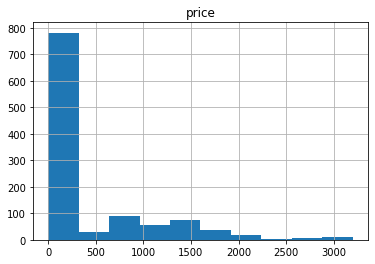

In [9]:
df.hist('price')

In [12]:
df2 = df[df['price']>=500]

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

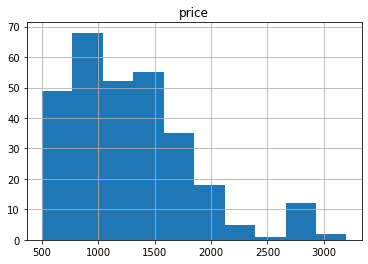

In [13]:
df2.hist('price')